 # Large-Scale Black-Box Optimization

This notebook presents the application of the $\texttt{EmbeddedHunter }$ for Large-Scale Black-Box Optimization Problems, mathematically:

\begin{eqnarray}
\text{minimize}\;\;& f(\mathbf{x})\\
\text{subject to}\;\;& \mathbf{x} \in \mathcal{X}\subset \mathbb{R}^n\;,
\end{eqnarray}
where $n>>10^2$. Without loss of generality $\mathcal{X}=[-1,1]^n$.

By $\textit{Abdullah Al-Dujaili, 2016}$

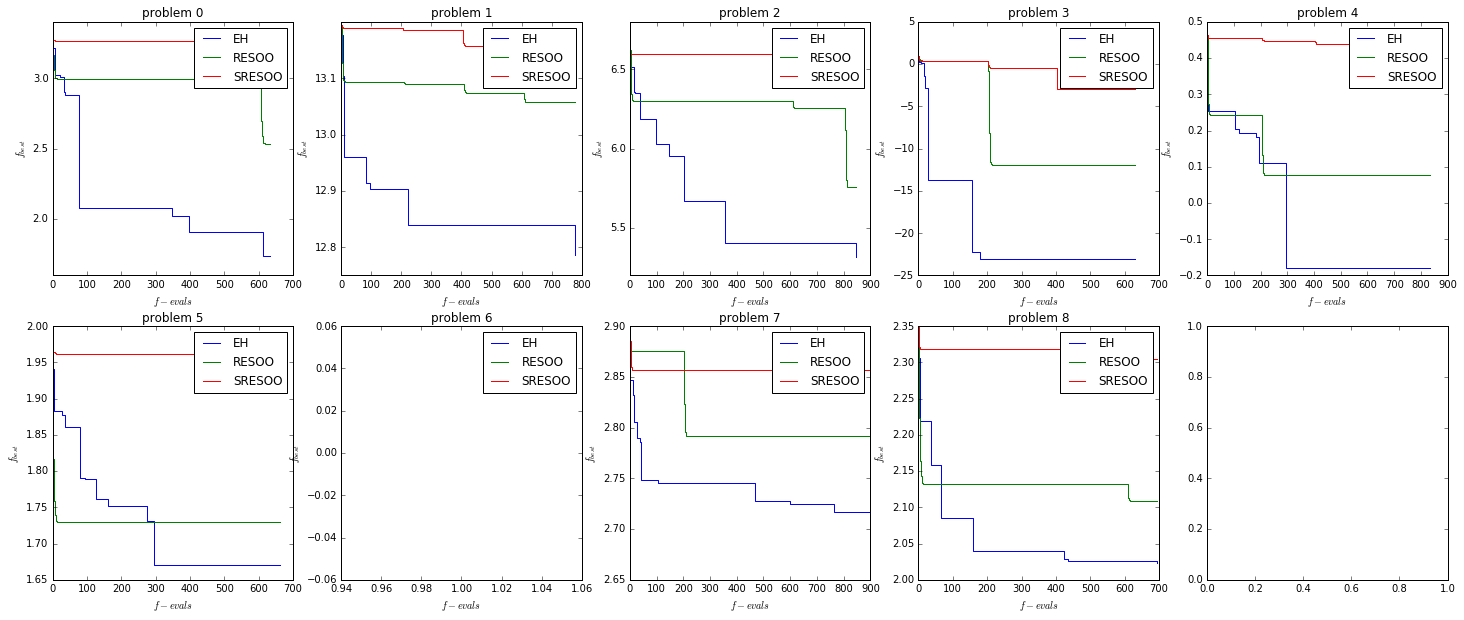

In [22]:
#--------------------------------------------------------------------------
#Copyright (c) 2016 by Abdullah Al-Dujaili
#
#This file is part of EmbeddedHunter - large-scale black-box solver
#EmbeddedHunter is free software: you can redistribute it and/or modify it under
#the terms of the GNU General Public License as published by the Free
#Software Foundation, either version 3 of the License, or (at your option)
#any later version.
#
#EmbeddedHunter is distributed in the hope that it will be useful, but WITHOUT
#ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or
#FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for
#more details.
#
#You should have received a copy of the GNU General Public License along
#with EmbeddedHunter.  If not, see <http://www.gnu.org/licenses/>.
#--------------------------------------------------------------------------
#Author information
#Abdullah Al-Dujaili
#ash.aldujaili@gmail.com
#--------------------------------------------------------------------------
import numpy as np
import time
import random
import os
import math
import matplotlib 
from Algorithms import EmbeddedHunter
from Algorithms import RESOO
from Algorithms import SRESOO
from Benchmark import LSProblem
import matplotlib
#matplotlib.use('GTKAgg')
from matplotlib import pyplot as plt

%matplotlib inline
# TOY Example
random.seed(412)
np.random.seed(412)
n = 10000
n_e = 1# the effective dimension is one
v = 1000
m = 5
# some functions
num_probs = 9
plt.subplots(2,(num_probs+1)//2, figsize=(25,10))
for pid in range(num_probs):
    problem = LSProblem(pid, isBenchmark = False, dim = n, dim_e = n_e) # False for optproblems
    problem.init_profile()
    f = lambda x : problem.f((problem.get_upper_range() - problem.get_lower_range()) * (x + 1.0) / 2.+ problem.get_lower_range())
    # EH
    record= EmbeddedHunter(n, f, v, M = m, n_e = n_e, eta= 0.35,isRecordTree = True)
    # RESOO
    problem.init_profile()
    RESOO(n, f, v, M = m, n_e = n_e, eta= 0.35)
    # SRESOO
    problem.init_profile()
    SRESOO(n, f, v, M = m, n_e = n_e, eta= 0.35)
    plt.subplot(2,(num_probs+1)//2,pid+1)
    problem.plot_profiles(legend=['EH','RESOO','SRESOO'])
plt.show()

<IPython.core.display.Javascript object>


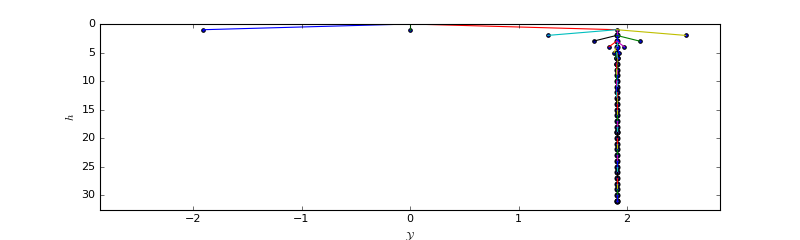

<IPython.core.display.Javascript object>


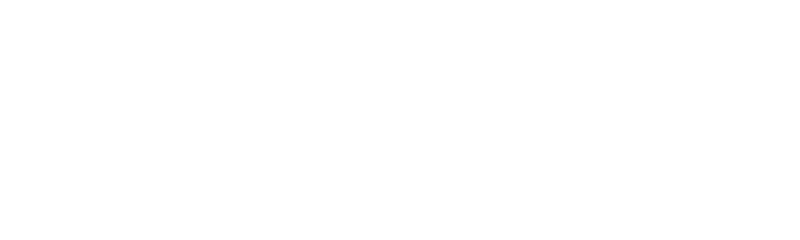

In [23]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

scale_y = 1
scale_x = 1
scale_z = 10

fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('$\mathcal{Y}$')
ax.set_ylabel('$h$')
ax.set_xlim(scale_x * record[0]['l_e'],scale_x * record[0]['u_e']) # first element in the record keeps the boundaries of the low-dimensional space Y
ax.set_ylim(1+ np.sqrt(v)* scale_y,0)

x = []
y = []
z = []
for node in record[1:100]:
    x= node['y'] * scale_x
    y= node['h'] * scale_y
    z= node['v'] * scale_z
    x_p = node['y_p'] * scale_x
    plt.scatter(x,y,s=z )
    fig.canvas.draw()
    plt.plot([x, x_p],[y, y-1])
    fig.canvas.draw()
    time.sleep(0.15)

#plt.scatter(x,y, s = z)

In [24]:
# view some information
record

[{'l_e': -2.857142857142857, 'u_e': 2.857142857142857},
 {'h': 1, 'v': 1, 'y': array([-1.9047619]), 'y_p': array([ 0.])},
 {'h': 1, 'v': 1, 'y': array([ 0.]), 'y_p': array([ 0.])},
 {'h': 1, 'v': 1, 'y': array([ 1.9047619]), 'y_p': array([ 0.])},
 {'h': 2, 'v': 1, 'y': array([ 1.26984127]), 'y_p': array([ 1.9047619])},
 {'h': 2, 'v': 2, 'y': array([ 1.9047619]), 'y_p': array([ 1.9047619])},
 {'h': 2, 'v': 1, 'y': array([ 2.53968254]), 'y_p': array([ 1.9047619])},
 {'h': 3, 'v': 1, 'y': array([ 1.69312169]), 'y_p': array([ 1.9047619])},
 {'h': 3, 'v': 2, 'y': array([ 1.9047619]), 'y_p': array([ 1.9047619])},
 {'h': 3, 'v': 1, 'y': array([ 2.11640212]), 'y_p': array([ 1.9047619])},
 {'h': 4, 'v': 1, 'y': array([ 1.83421517]), 'y_p': array([ 1.9047619])},
 {'h': 4, 'v': 2, 'y': array([ 1.9047619]), 'y_p': array([ 1.9047619])},
 {'h': 4, 'v': 1, 'y': array([ 1.97530864]), 'y_p': array([ 1.9047619])},
 {'h': 5, 'v': 1, 'y': array([ 1.88124633]), 'y_p': array([ 1.9047619])},
 {'h': 5, 'v': 2